In [1]:
# Import necessary libraries and suppress warning
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Switch backend if only plt is imported
get_ipython().run_line_magic('matplotlib', 'inline')


import seaborn as sns
sns.set(style='whitegrid')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

print('Imports complete')

Imports complete


In [2]:
data = 'computer_prices_all.csv'
df = pd.read_csv(data, encoding='ascii', delimiter=',')
print('Dataset Loaded. Here are the first few records:')
print(df.head())
# basic checks data info to infer types and missing values
print('\nDataset Info:')
print(df.info())


Dataset Loaded. Here are the first few records:
  device_type     brand              model  release_year       os form_factor  \
0     Desktop   Samsung  Samsung Forge XDI          2022  Windows         ATX   
1      Laptop   Samsung    Samsung Pro KM8          2022  Windows  Mainstream   
2     Desktop    Lenovo   Lenovo Strix BIE          2024    macOS         SFF   
3     Desktop      Dell      Dell Cube AXR          2024  Windows         ATX   
4      Laptop  Gigabyte   Gigabyte Pro IX1          2024    Linux      Gaming   

  cpu_brand         cpu_model  cpu_tier  cpu_cores  ...  resolution  \
0     Intel    Intel i5-11129         3         12  ...   2560x1440   
1     Intel    Intel i7-11114         4         12  ...   1920x1080   
2       AMD  AMD Ryzen 5 5168         2          8  ...   3440x1440   
3       AMD  AMD Ryzen 5 7550         2          6  ...   3440x1440   
4       AMD  AMD Ryzen 7 6230         5         16  ...   2560x1600   

   refresh_hz  battery_wh charger_watt

In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print('Missing Values in Each Column:')
print(missing_values[missing_values > 0])

# For the purpose of this notebook, we fill missing numeric values with median and categorical with mode we did it as a procedure
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
print('\nMissing Values After Cleaning:')
print(df.isnull().sum().sum())

# Ensure that columns like 'release_year' are of integer type
df['release_year'] = df['release_year'].astype(int)

# Preview the cleaned dataset
print('\nCleaned Data Preview:')
print(df.head())

Missing Values in Each Column:
Series([], dtype: int64)

Missing Values After Cleaning:
0

Cleaned Data Preview:
  device_type     brand              model  release_year       os form_factor  \
0     Desktop   Samsung  Samsung Forge XDI          2022  Windows         ATX   
1      Laptop   Samsung    Samsung Pro KM8          2022  Windows  Mainstream   
2     Desktop    Lenovo   Lenovo Strix BIE          2024    macOS         SFF   
3     Desktop      Dell      Dell Cube AXR          2024  Windows         ATX   
4      Laptop  Gigabyte   Gigabyte Pro IX1          2024    Linux      Gaming   

  cpu_brand         cpu_model  cpu_tier  cpu_cores  ...  resolution  \
0     Intel    Intel i5-11129         3         12  ...   2560x1440   
1     Intel    Intel i7-11114         4         12  ...   1920x1080   
2       AMD  AMD Ryzen 5 5168         2          8  ...   3440x1440   
3       AMD  AMD Ryzen 5 7550         2          6  ...   3440x1440   
4       AMD  AMD Ryzen 7 6230         5      

EDA 


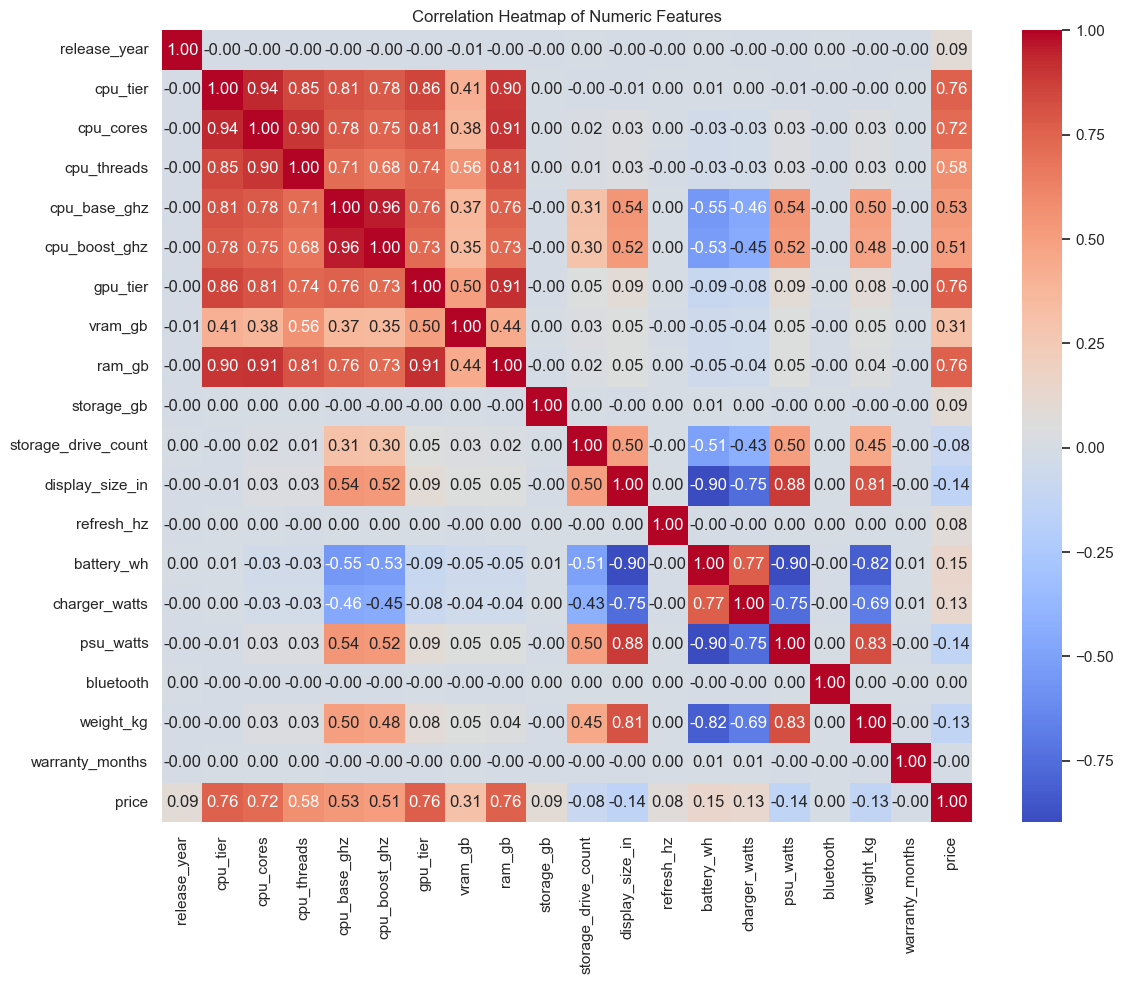

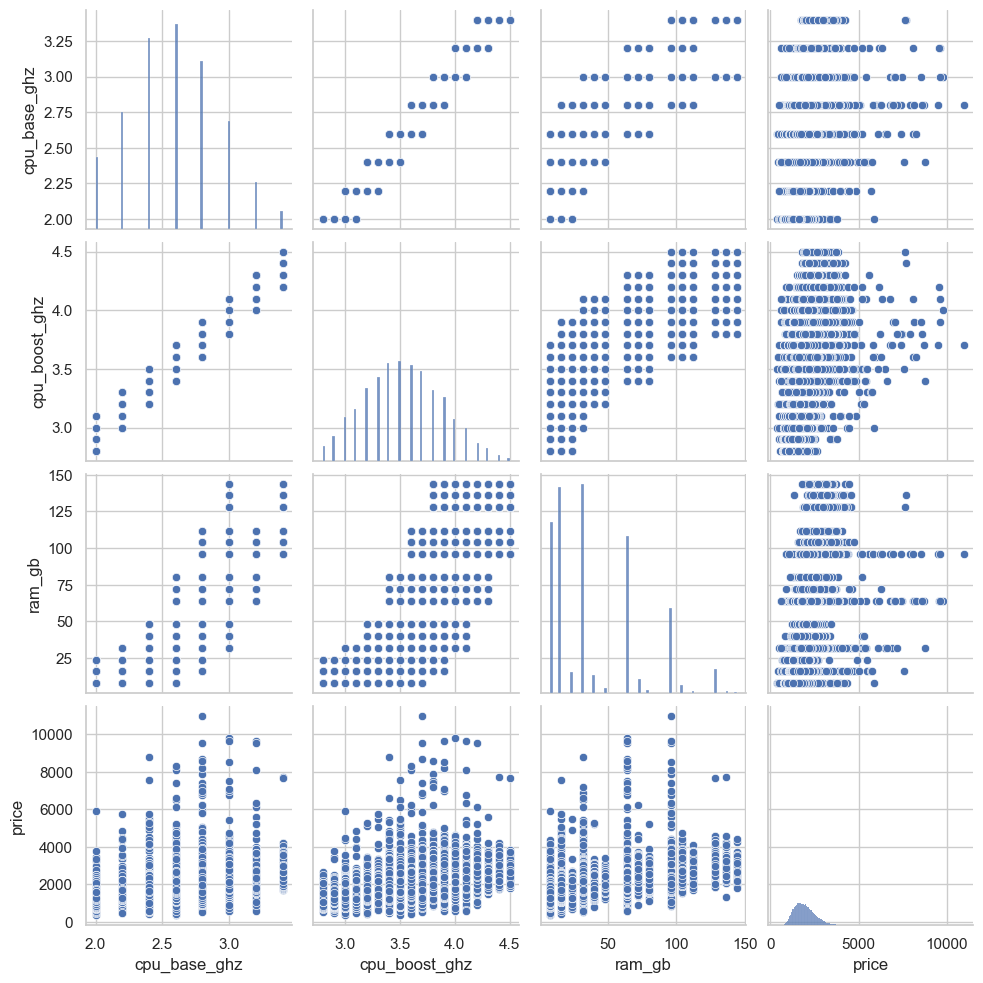

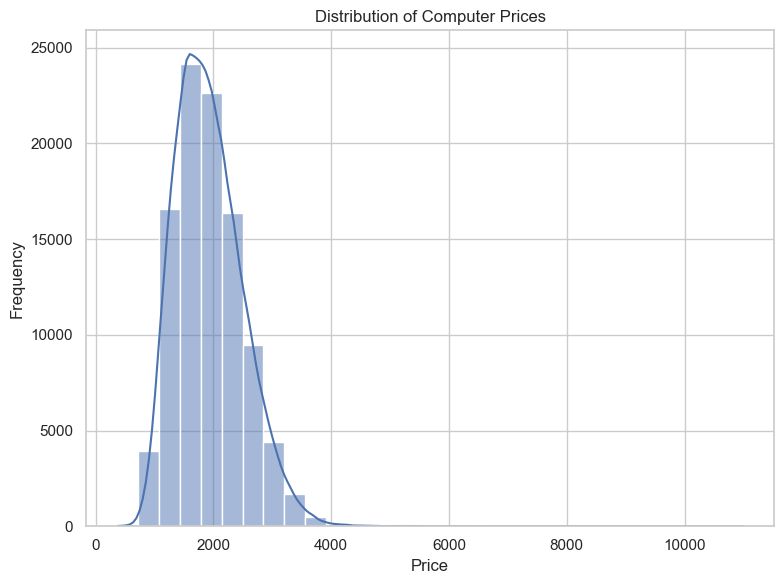

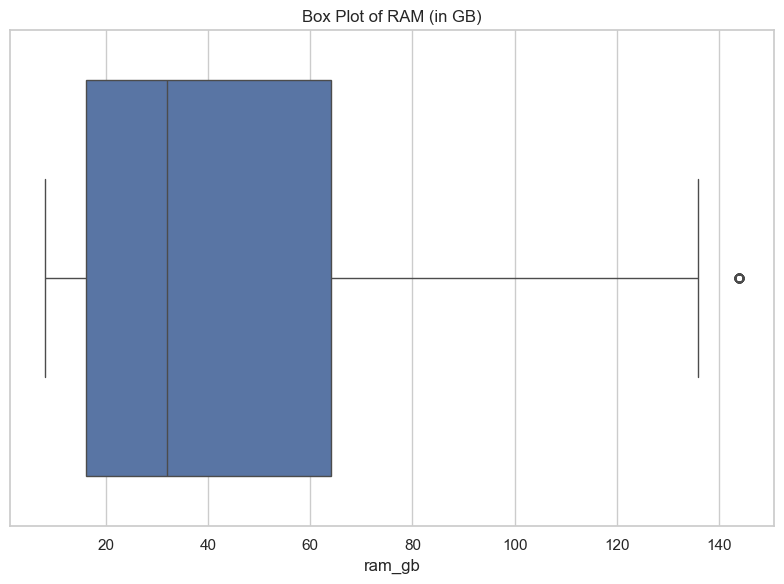

In [4]:

numeric_df = df.select_dtypes(include=[np.number])
# Only plot correlation heatmap if we have 4 or more numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    plt.show()
else:
    print('Not enough numeric features for a correlation heatmap.')

# Pair Plot of some selected numeric features
selected_cols = ['cpu_base_ghz', 'cpu_boost_ghz', 'ram_gb', 'price']
if all(col in numeric_df.columns for col in selected_cols):
    sns.pairplot(df[selected_cols])
    plt.savefig('pairplot.png')
    plt.show()
else:
    print('Selected features for pair plot are not all numeric or not present.')

# Histogram of Price
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Computer Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('price_histogram.png')
plt.show()

# Box Plot of RAM
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ram_gb'])
plt.title('Box Plot of RAM (in GB)')
plt.tight_layout()
plt.savefig('ram_boxplot.png')
plt.show()


Mean Squared Error: 88621.77347158558
R^2 Score: 0.7316233647153959


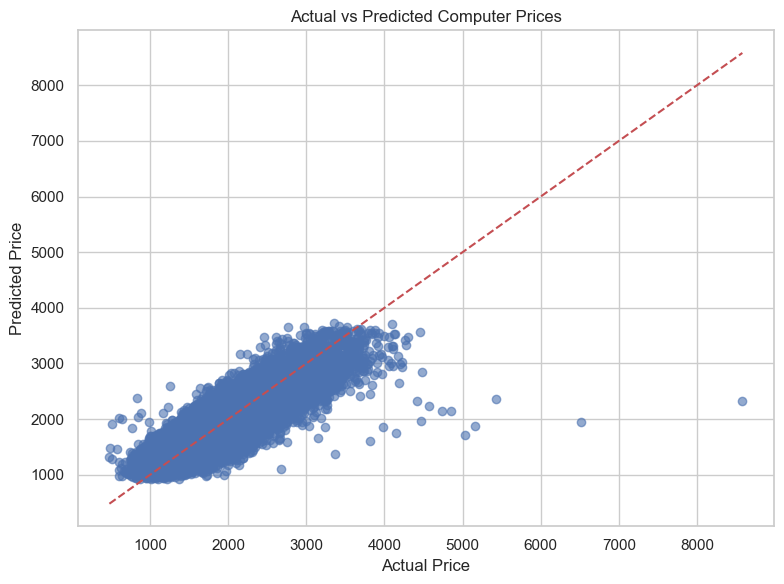

In [5]:
features = ['release_year', 'cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz', 'cpu_boost_ghz', 'gpu_tier', 'vram_gb', 'ram_gb', 'storage_gb', 'display_size_in', 'refresh_hz', 'battery_wh', 'charger_watts', 'psu_watts', 'warranty_months']

# It is common to check if all features exist in the dataframe
features = [col for col in features if col in df.columns]
# for basic linear regression method we split df into x (columns that we use for learning) and y(column that we want to predict)
X = df[features]
y = df['price']
# We did basic  linear regression before the complex regression and classification tasks 
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Computer Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

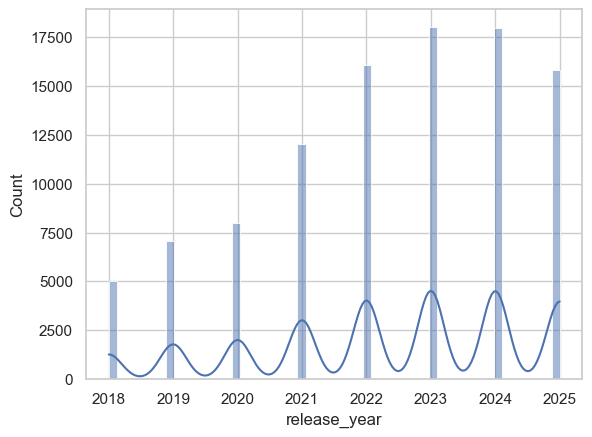

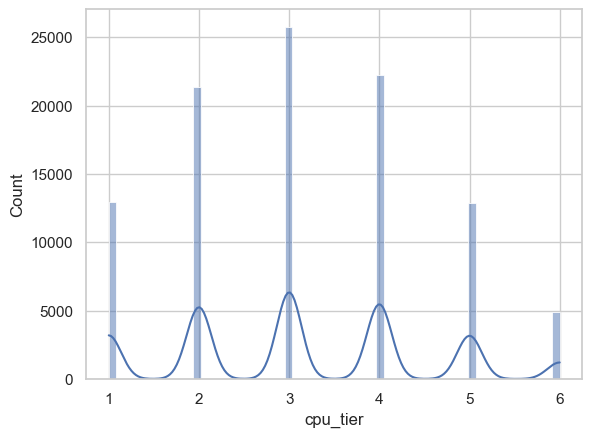

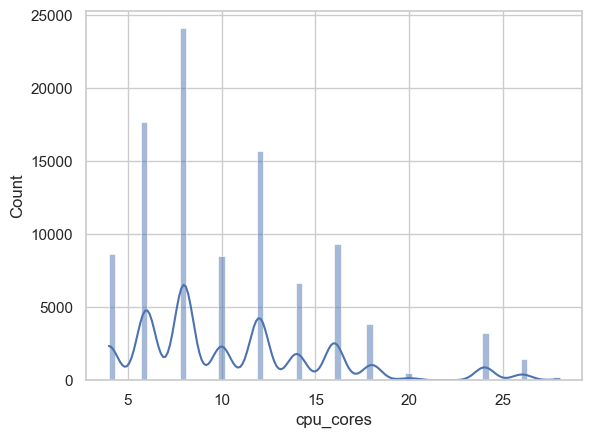

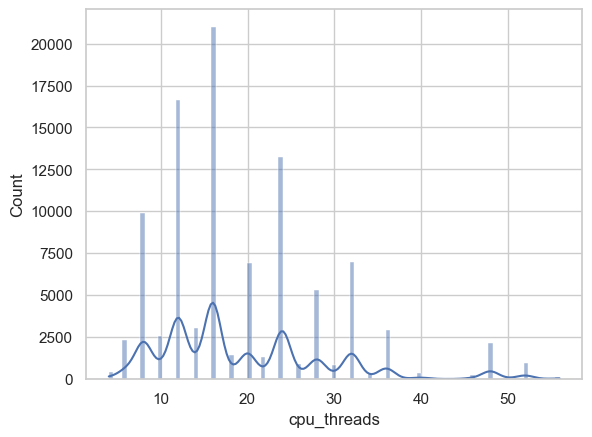

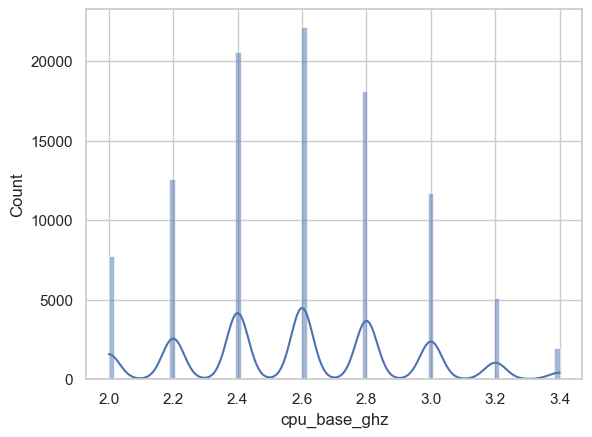

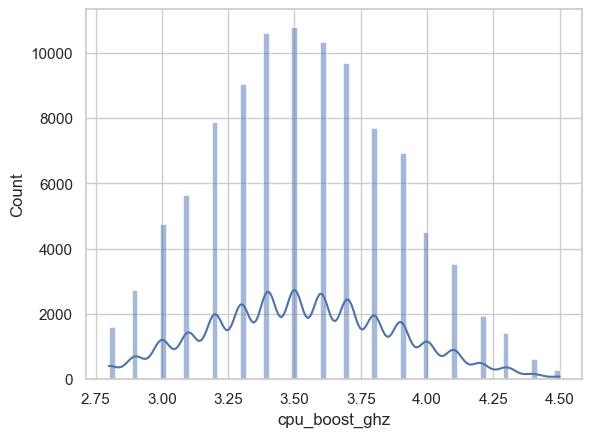

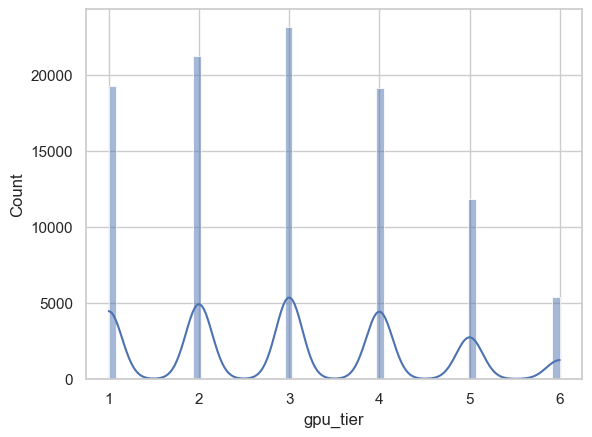

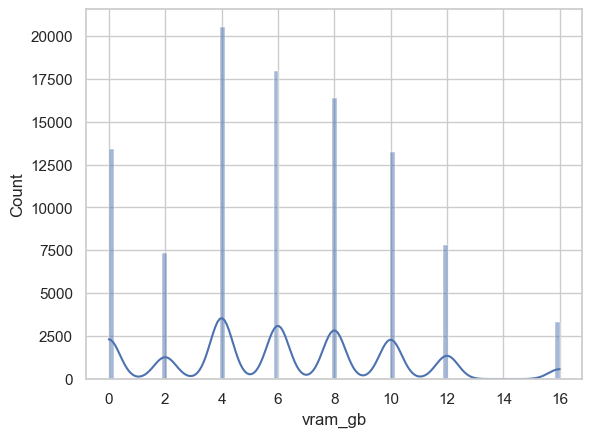

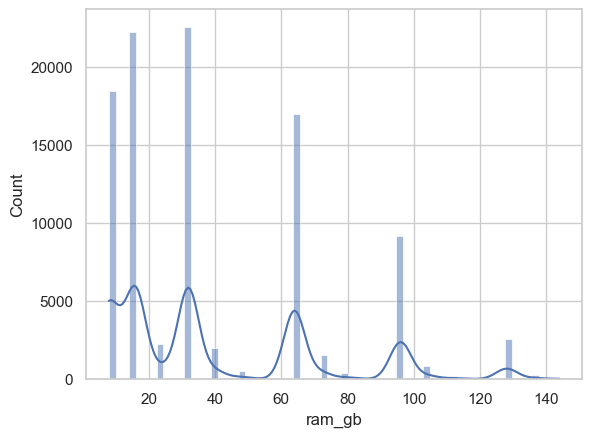

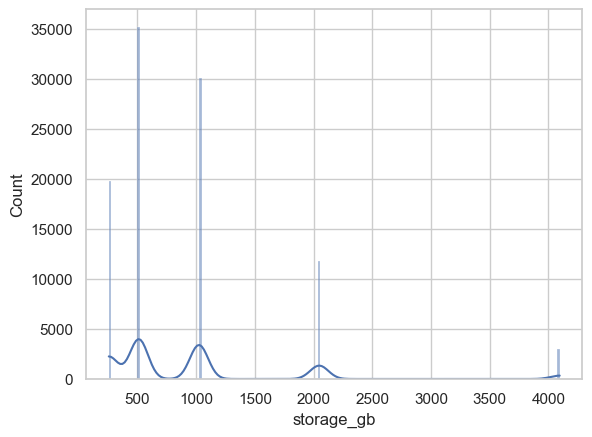

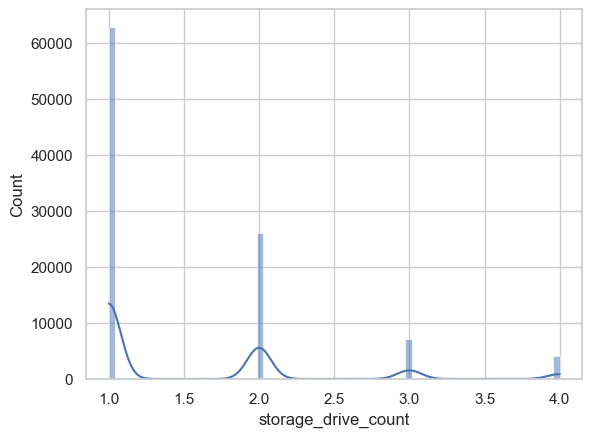

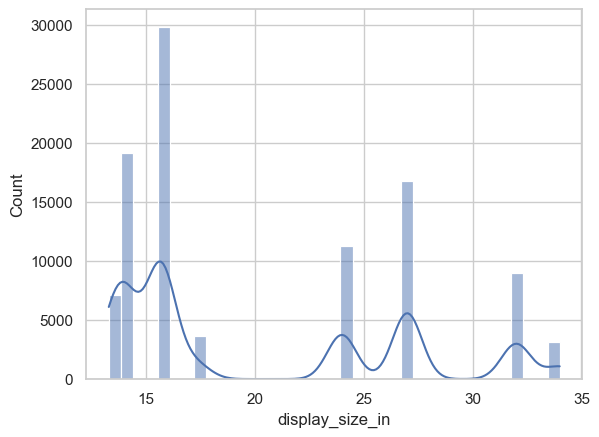

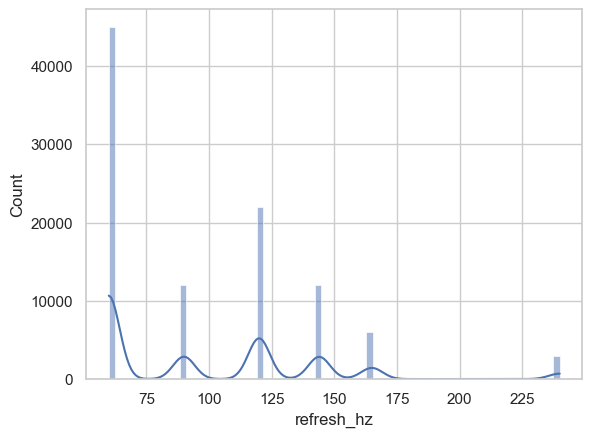

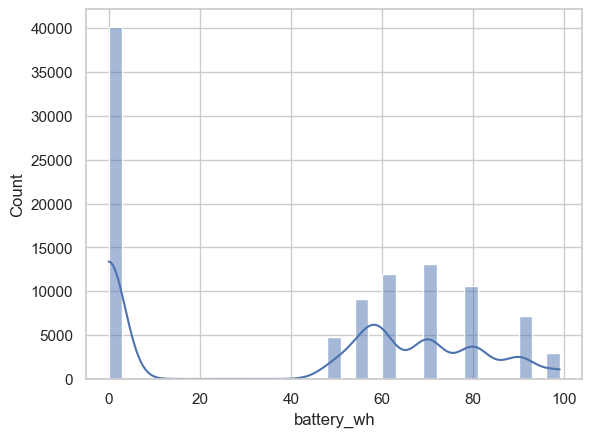

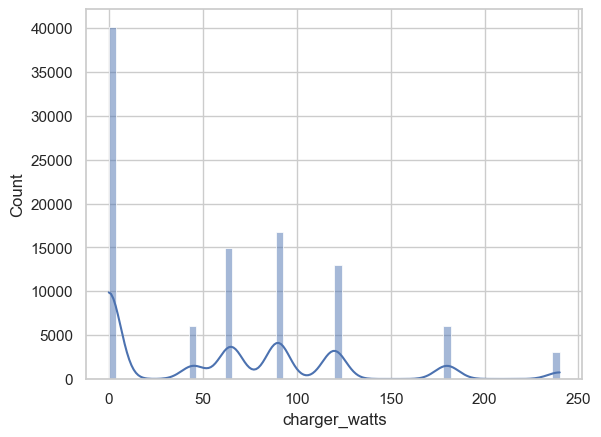

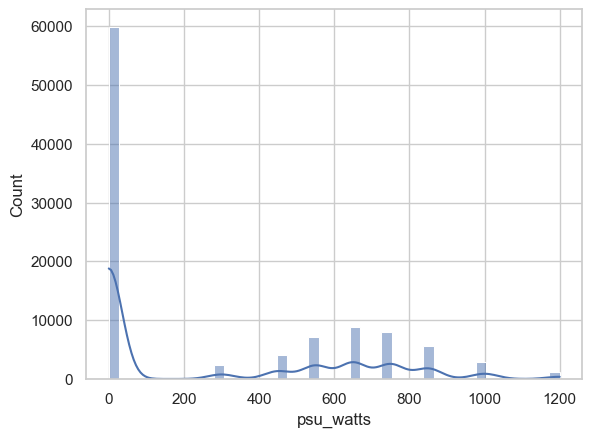

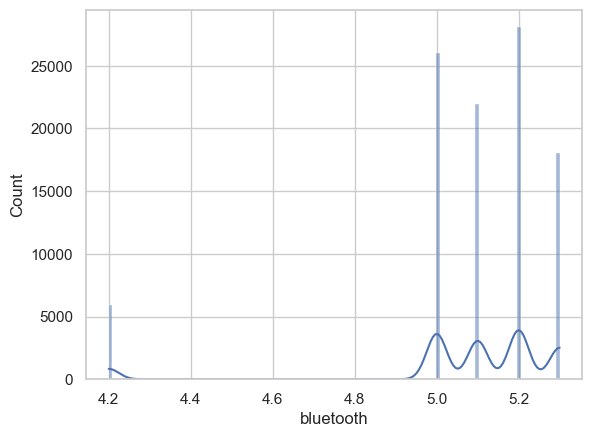

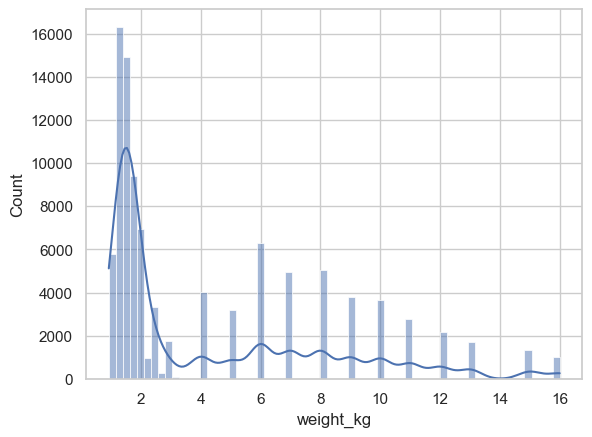

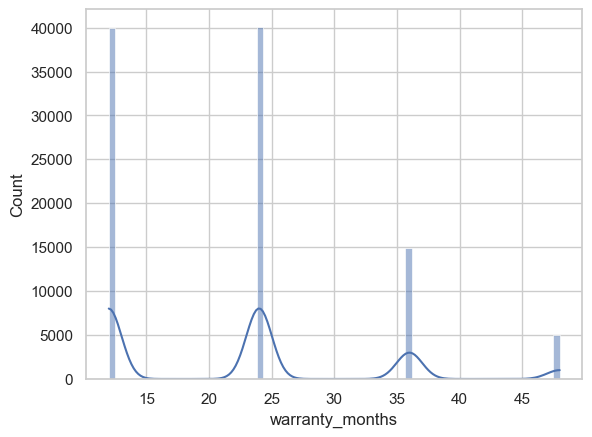

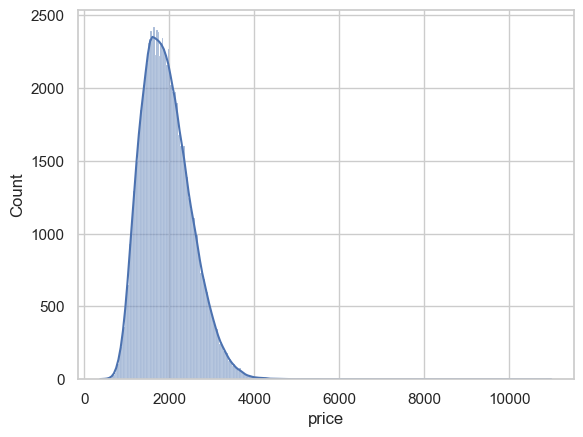

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    sns.histplot(x=col, data=df, kde=True)
    plt.show()

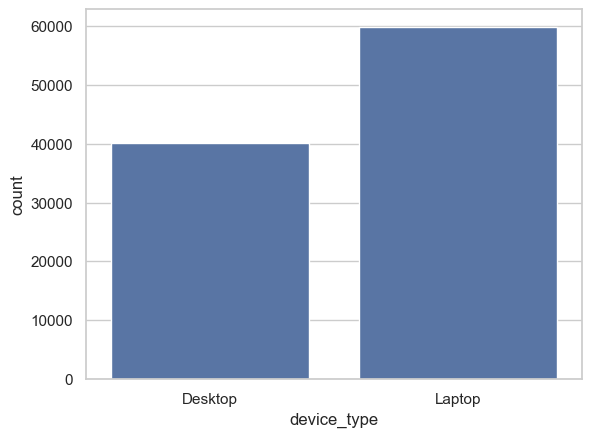

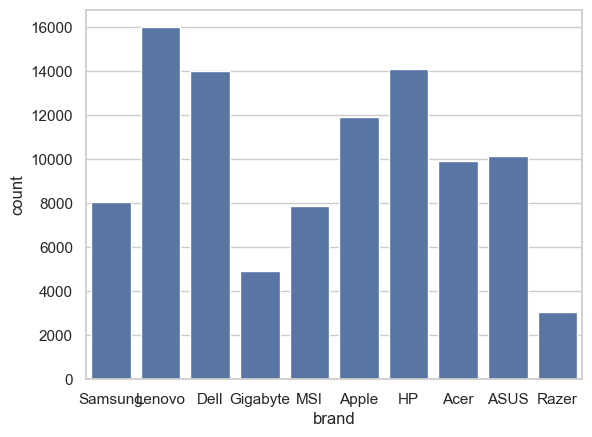

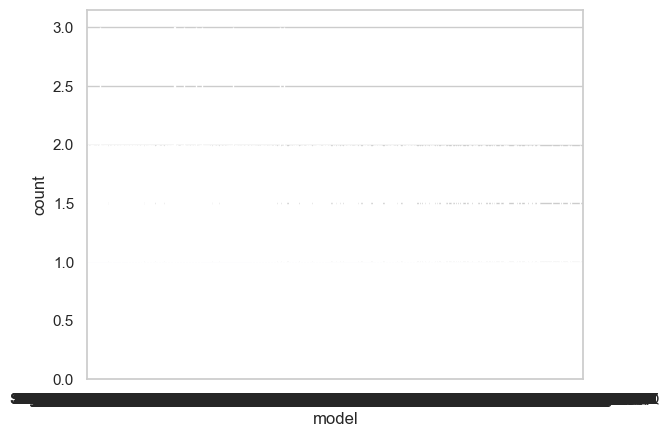

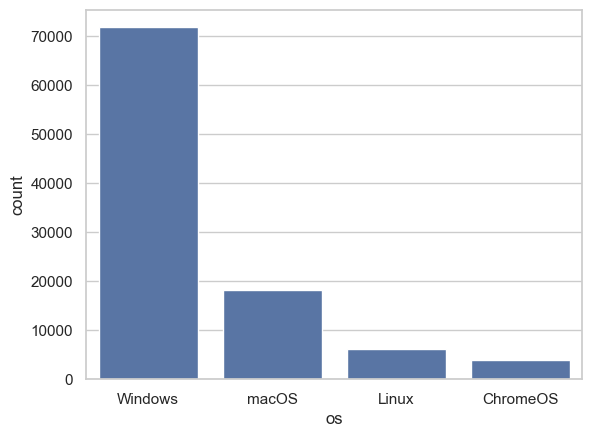

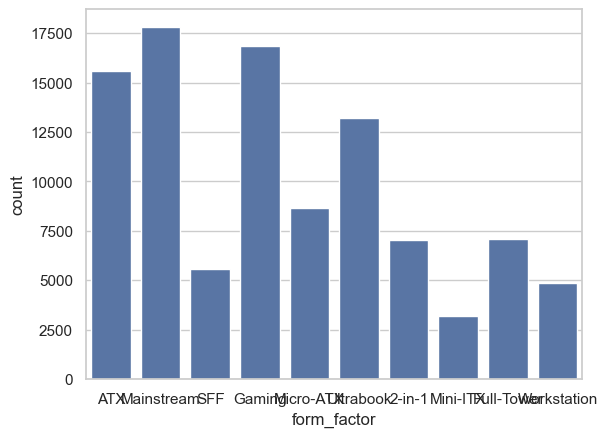

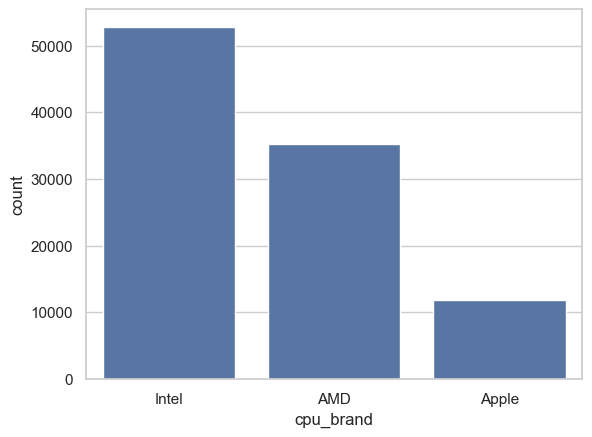

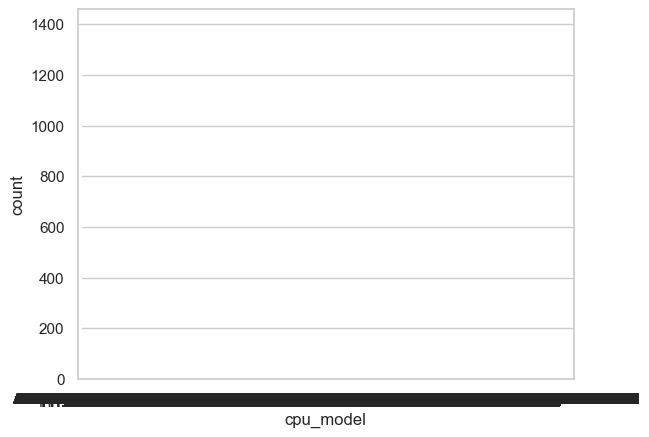

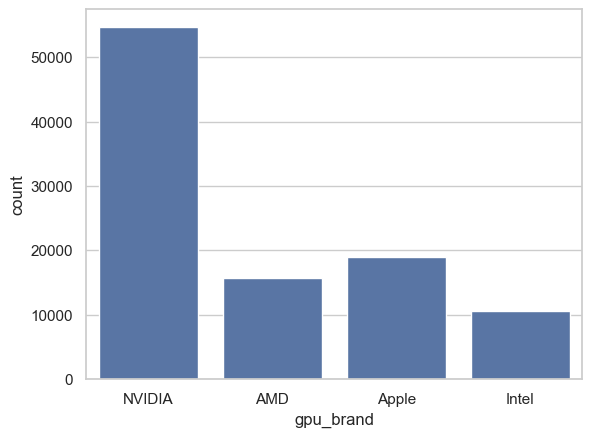

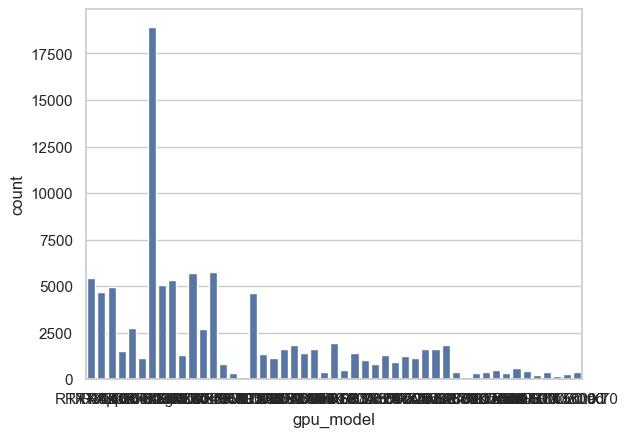

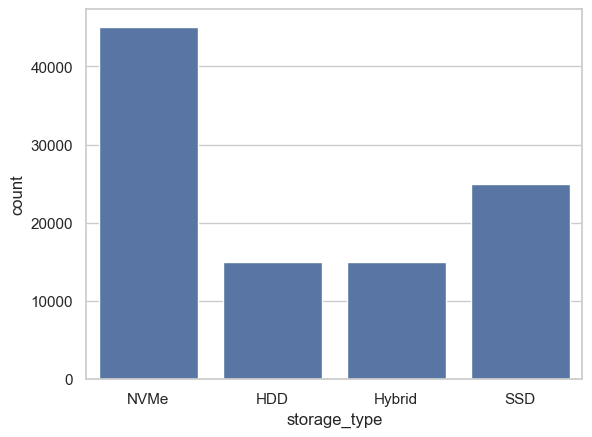

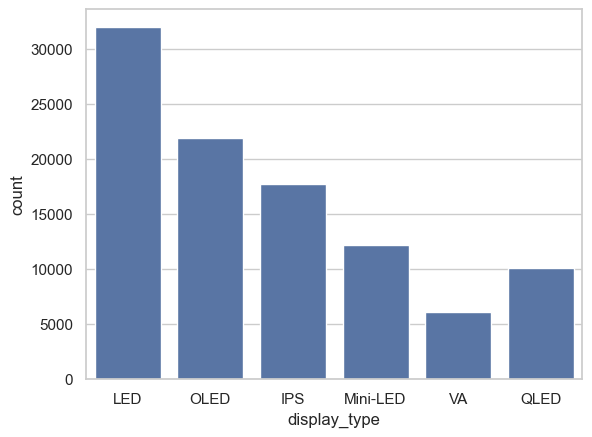

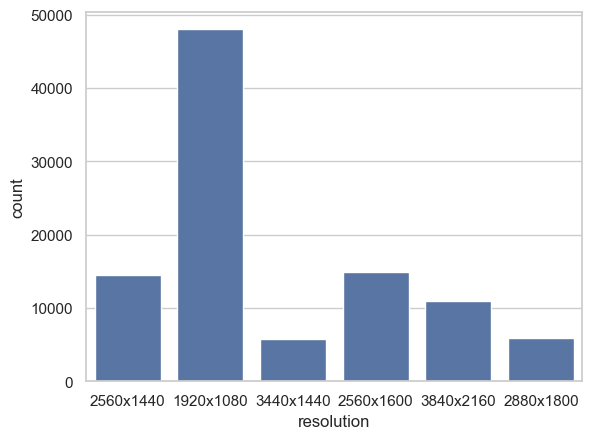

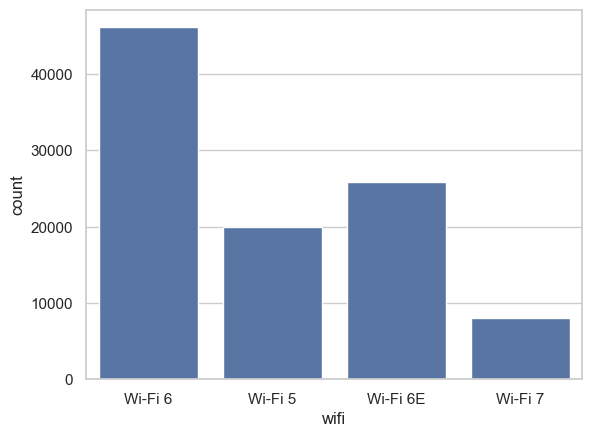

In [12]:
for col in df:
    # to detect the distribution of the categorical variables 
    if df[col].dtype == 'O':
        sns.countplot(x=col,data=df)
        plt.show()

In [7]:
results_df = X_test.copy()
results_df['Actual_Price'] = y_test
results_df['Predicted_Price'] = y_pred

# 2. Calculate the Residual (Error)
results_df['Residual'] = results_df['Actual_Price'] - results_df['Predicted_Price']
results_df['Absolute_Residual'] = results_df['Residual'].abs()

mean_abs_error = results_df['Absolute_Residual'].mean()
std_abs_error = results_df['Absolute_Residual'].std()

print(f"mean absolute error (MAE): ${mean_abs_error:.2f}")
print(f"Standart deviation Absolute error: ${std_abs_error:.2f}")
#detect outliers with IQR 
threshold = mean_abs_error + 1.5 * std_abs_error
print(f" (Absolute Residual >): ${threshold:.2f}")

# Filtering outliers points 
outliers_by_threshold = results_df[results_df['Absolute_Residual'] > threshold]
print(f"Number of the outliers: {len(outliers_by_threshold)}")
outliers_by_threshold.head()
# at this code we define the outliers like (Q1 + 1.5*IQR, Q3 -1.5*IQR) like [CI95%]


mean absolute error (MAE): $228.26
Standart deviation Absolute error: $191.10
 (Absolute Residual >): $514.92
Number of the outliers: 1352


,release_year,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_tier,vram_gb,ram_gb,storage_gb,display_size_in,refresh_hz,battery_wh,charger_watts,psu_watts,warranty_months,Actual_Price,Predicted_Price,Residual,Absolute_Residual
50074,2021,4,12,12,2.6,3.4,3,6,32,512,17.3,60,80,65,0,12,1717.99,2249.490704,-531.500704,531.500704
149,2024,6,24,24,3.0,3.9,6,2,128,512,15.6,60,70,90,0,12,4304.99,3480.262743,824.727257,824.727257
63120,2023,4,14,28,2.6,3.7,5,12,72,2048,15.6,90,70,65,0,24,3187.99,2573.869497,614.120503,614.120503
51685,2021,3,10,10,2.4,3.5,3,2,32,2048,14.0,60,70,65,0,12,1662.99,2180.420516,-517.430516,517.430516
65083,2022,4,12,12,2.6,3.6,3,2,32,512,15.6,60,80,65,0,24,1603.99,2257.660865,-653.670865,653.670865


In [8]:
# analyses for data , clean data(the outliers is removed) , Outliers
analysis_features = [
    'ram_gb', 
    'vram_gb', 
    'storage_gb', 
    'cpu_base_ghz', 
    'cpu_boost_ghz', 
    'cpu_tier',
    'release_year'
]
comparison_data = []
#statistical part of the data analysis 
for feature in analysis_features:
    comparison_data.append({
        'Feature': feature,
        'Data set': 'All data',
        'Mean': results_df[feature].mean(),
        'Median': results_df[feature].median(),
        'Min': results_df[feature].min(),
        'Max': results_df[feature].max()
    })

# 2. Statistic Outliers
for feature in analysis_features:
    comparison_data.append({
        'Feature': feature,
        'Data set': 'Outliers (High Error)',
        'Mean': outliers_by_threshold[feature].mean(),
        'Median': outliers_by_threshold[feature].median(),
        'Min': outliers_by_threshold[feature].min(),
        'Max': outliers_by_threshold[feature].max()
    })

# 3. Clean Data
clean_df = results_df.drop(outliers_by_threshold.index)
for feature in analysis_features:
    comparison_data.append({
        'Feature': feature,
        'Data set': 'Clean Data',
        'Mean': clean_df[feature].mean(),  
        'Median': clean_df[feature].median(),
        'Min': clean_df[feature].min(),
        'Max': clean_df[feature].max()
    })

# Creating table 
comparison_df = pd.DataFrame(comparison_data)

# Sorting
comparison_df = comparison_df.sort_values(by=['Feature', 'Data set'])

print("--- Actual data vs Outliers Comparison ---\n")
print(comparison_df.set_index(['Feature', 'Data set']).round(2))

--- Actual data vs Outliers Comparison ---

                                        Mean  Median     Min     Max
Feature       Data set                                              
cpu_base_ghz  All data                  2.59     2.6     2.0     3.4
              Clean Data                2.59     2.6     2.0     3.4
              Outliers (High Error)     2.68     2.6     2.0     3.4
cpu_boost_ghz All data                  3.53     3.5     2.8     4.5
              Clean Data                3.52     3.5     2.8     4.5
              Outliers (High Error)     3.63     3.6     2.8     4.5
cpu_tier      All data                  3.16     3.0     1.0     6.0
              Clean Data                3.12     3.0     1.0     6.0
              Outliers (High Error)     3.63     4.0     1.0     6.0
ram_gb        All data                 39.82    32.0     8.0   144.0
              Clean Data               38.98    32.0     8.0   144.0
              Outliers (High Error)    51.47    32.0     8.

In [9]:
# we analyze some catogorical variables efficiency 
brands = df['brand'].unique()
print(brands)
price_groups = []
for brand in brands :
    price_groups.append(df[df['brand'] == brand]['price'].values)

print(df.groupby('brand')['price'].mean().sort_values(ascending= False).round(2))

['Samsung' 'Lenovo' 'Dell' 'Gigabyte' 'MSI' 'Apple' 'HP' 'Acer' 'ASUS'
 'Razer']
brand
Apple       2362.30
Razer       2079.53
Samsung     1930.39
MSI         1905.56
Dell        1882.82
Gigabyte    1866.30
Lenovo      1865.95
HP          1857.35
ASUS        1848.11
Acer        1760.35
Name: price, dtype: float64


In [10]:
#For regression task we did anova test on categorical variables 
categorical_features = ['device_type','brand','os','form_factor','cpu_brand','gpu_brand','storage_type','display_type','resolution','wifi'] 
target_column = 'price'
print("--- ANOVA Test Results (Categorical Features vs. Price) ---")

for feature in categorical_features:
    categories = df[feature].unique()
    price_groups = []
    for category in categories:
        price_groups.append(df[df[feature] == category][target_column].values)

    # 3. ANOVA test

    f_statistic, p_value = stats.f_oneway(*price_groups)
    result = "Meaningful(usable attribute)" if p_value < 0.05 else "there is no difference(low effect)"
    print(f"\n: {feature.upper()}")
    print(f"F Statistiği: {f_statistic:.4f} | P-Value: {p_value:.4f}")
    print(f"Result: {result}")

--- ANOVA Test Results (Categorical Features vs. Price) ---

: DEVICE_TYPE
F Statistiği: 2433.1483 | P-Value: 0.0000
Result: Meaningful(usable attribute)

: BRAND
F Statistiği: 1024.1031 | P-Value: 0.0000
Result: Meaningful(usable attribute)

: OS
F Statistiği: 1190.1577 | P-Value: 0.0000
Result: Meaningful(usable attribute)

: FORM_FACTOR
F Statistiği: 395.0953 | P-Value: 0.0000
Result: Meaningful(usable attribute)

: CPU_BRAND
F Statistiği: 4081.4057 | P-Value: 0.0000
Result: Meaningful(usable attribute)

: GPU_BRAND
F Statistiği: 1468.5922 | P-Value: 0.0000
Result: Meaningful(usable attribute)

: STORAGE_TYPE
F Statistiği: 119.0055 | P-Value: 0.0000
Result: Meaningful(usable attribute)

: DISPLAY_TYPE
F Statistiği: 895.1374 | P-Value: 0.0000
Result: Meaningful(usable attribute)

: RESOLUTION
F Statistiği: 966.4780 | P-Value: 0.0000
Result: Meaningful(usable attribute)

: WIFI
F Statistiği: 0.4447 | P-Value: 0.7211
Result: there is no difference(low effect)
